In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/intro_final', echo=False, max_overflow=-1)

In [2]:
query = 'select * from clean_tweets'

df = pd.read_sql(query, engine)

df.head()

,text,target
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he cannot update his facebook by...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


<h1><b>Removing NaN values</b></h1>

In [3]:
df[df.isnull().any(axis=1)].head()

,text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [4]:
np.sum(df.isnull().any(axis=1))

3959

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [36]:
neg_tweets = df[df.target == 0]
neg_text = []
for t in neg_tweets.text:
    neg_text.append(t)
neg_text = pd.Series(neg_text).str.cat(sep=' ')

In [7]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

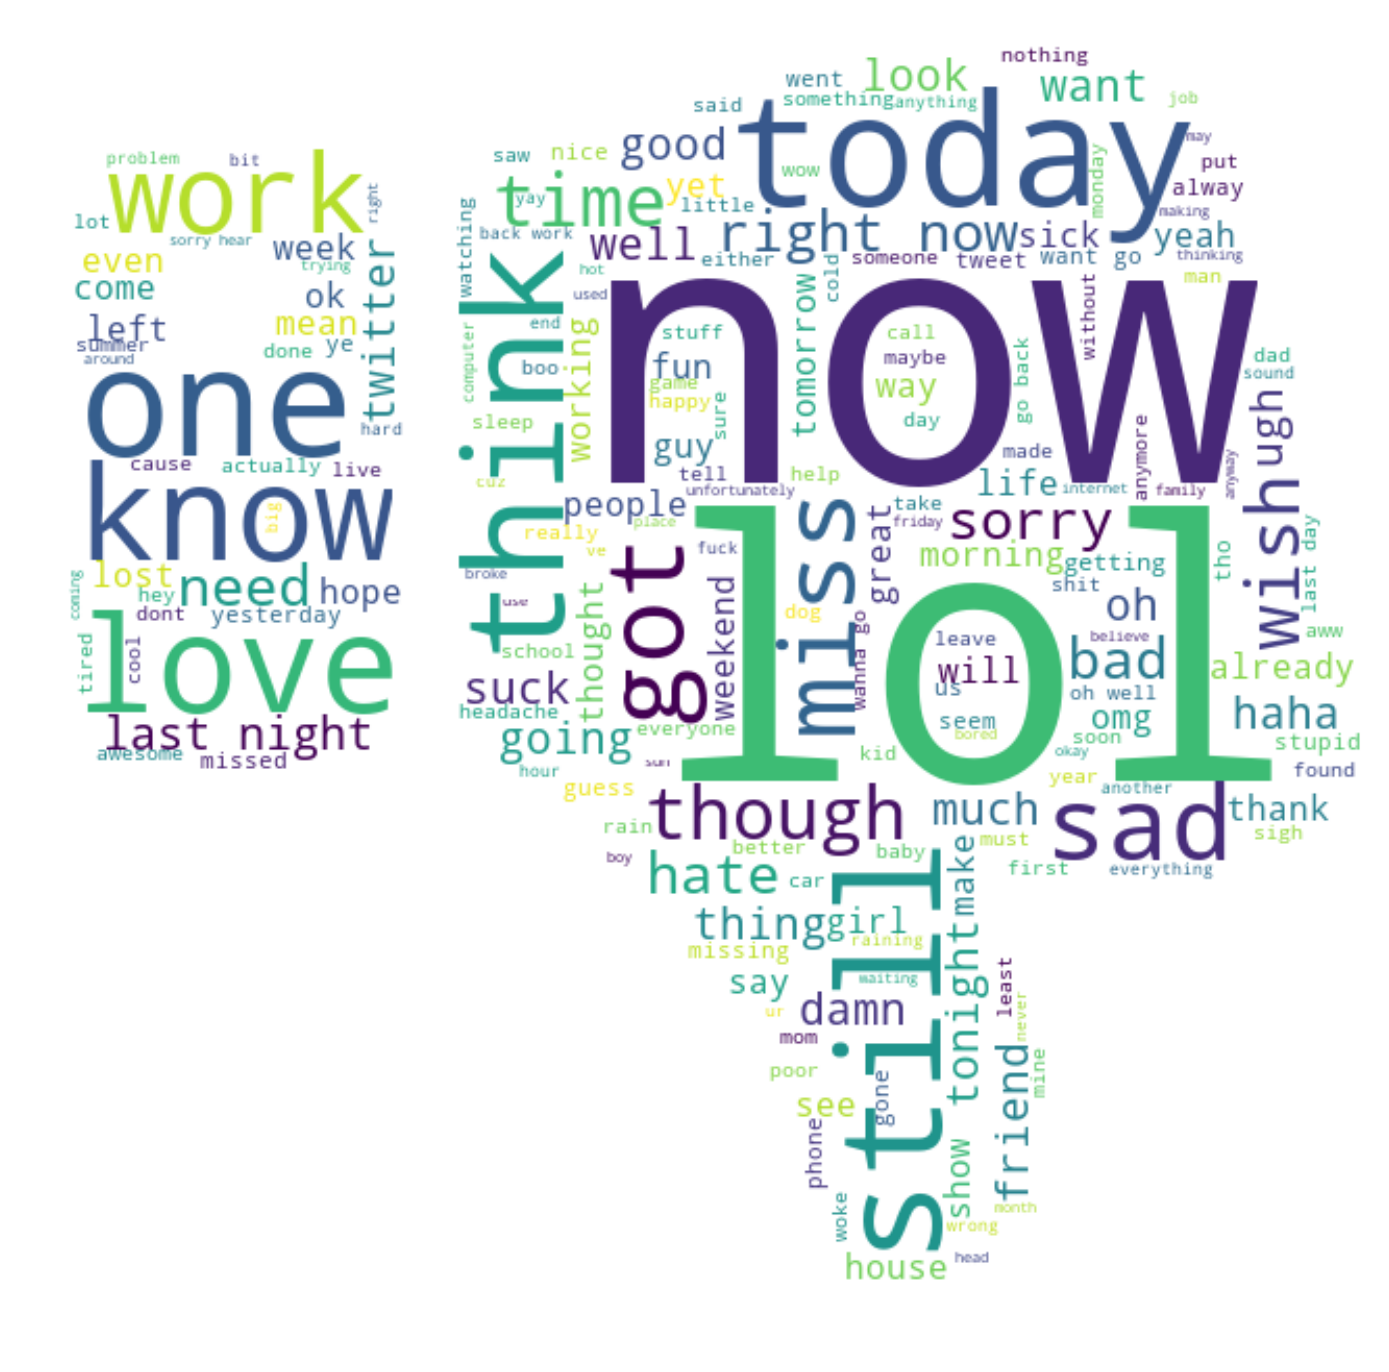

In [39]:
negative_mask = np.array(Image.open('thumbs_down.png'))
wc = WordCloud(width=1500, height=1500, mask=negative_mask, max_font_size=180, background_color='white').generate(neg_text)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
pos_tweets = df[df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

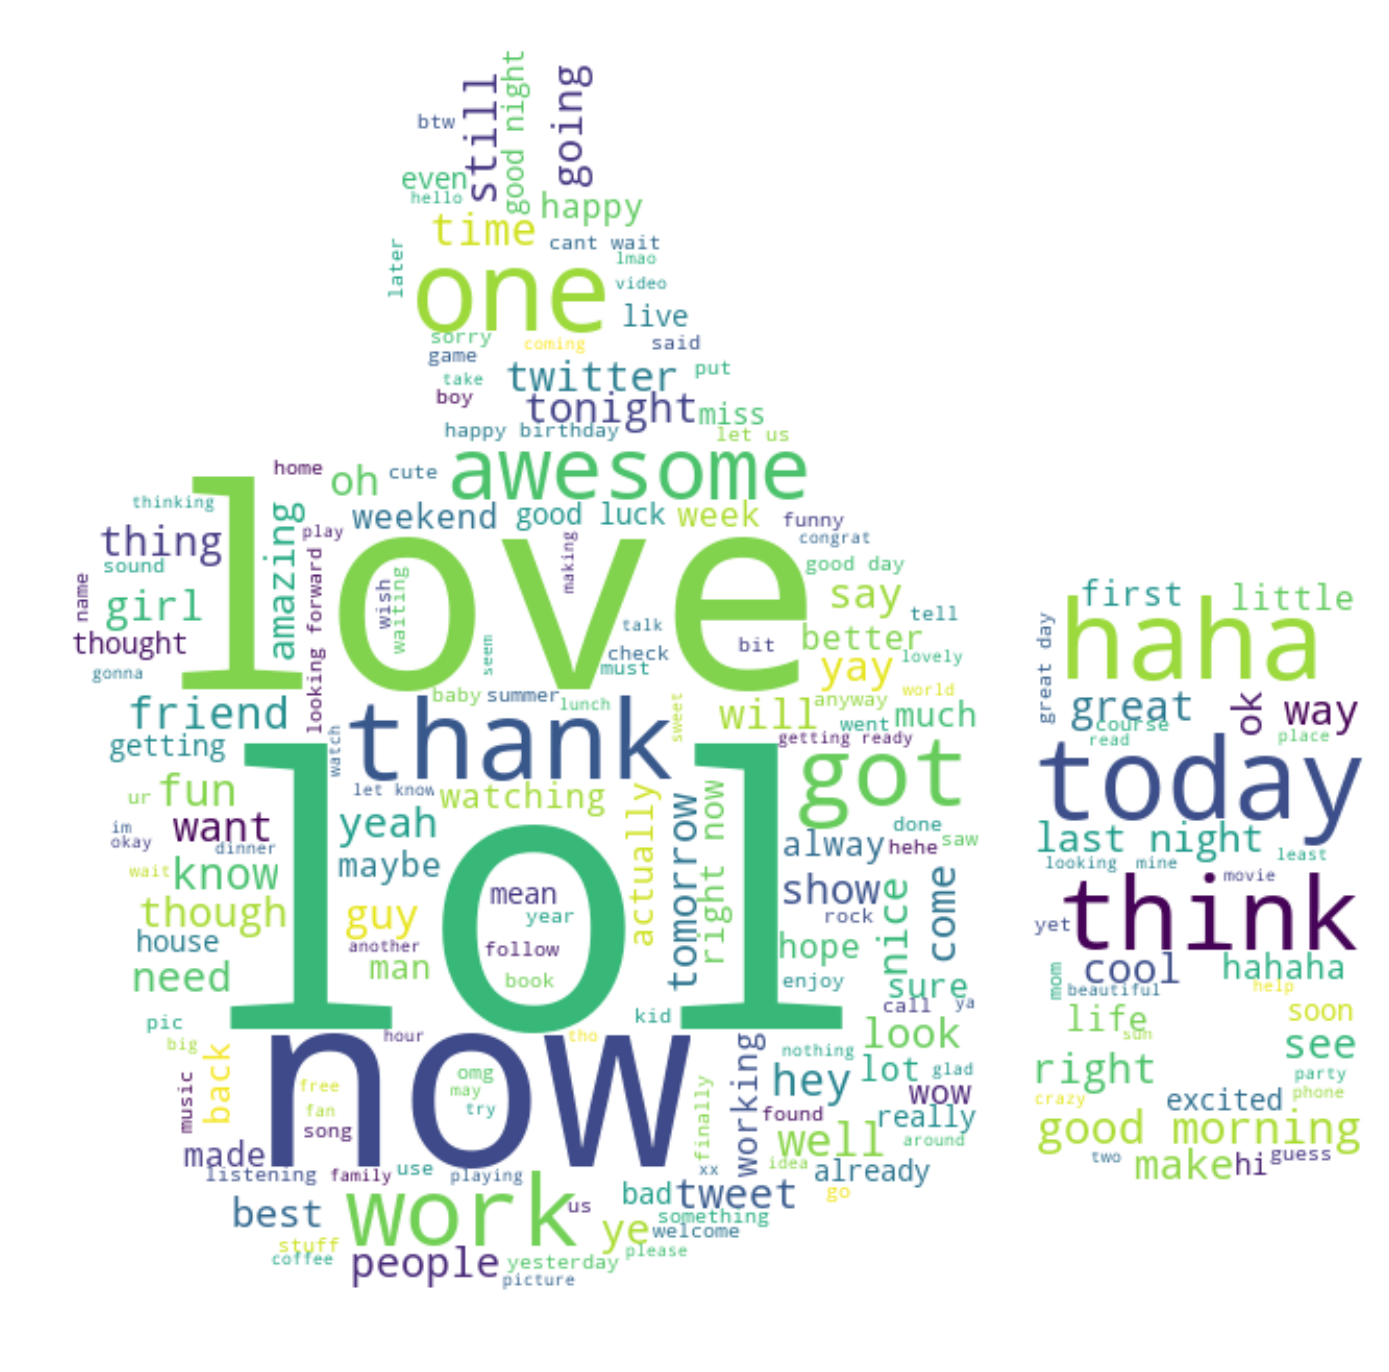

In [34]:
positive_mask = np.array(Image.open('thumbs_up.png'))
wc = WordCloud(width=1500, height=1500, mask=positive_mask, max_font_size=180, background_color='white').generate(pos_string)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1><b>Using countVectorizer to get unique tokens</b></h1>

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words='english')
count_vec.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
len(count_vec.get_feature_names()) #264942 unique words

264631

In [12]:
negative_doc_matrix = count_vec.transform(df[df.target == 0].text)
positive_doc_matrix = count_vec.transform(df[df.target == 1].text)

In [13]:
neg_termFreq = np.sum(negative_doc_matrix,axis=0)
pos_termFreq = np.sum(positive_doc_matrix,axis=0)

In [14]:
neg = np.squeeze(np.asarray(neg_termFreq))
pos = np.squeeze(np.asarray(pos_termFreq))

In [15]:
term_freq_df = pd.DataFrame([neg,pos],columns=count_vec.get_feature_names()).transpose() #DF with positive and negative term counts

In [16]:
doc_matrix = count_vec.transform(df.text)

In [17]:
df[df['target'] == 0].tail() #Printing tail to find index of last occuring 0 value

,text,target
798192,sick spending my day laying in bed listening to,0
798193,gmail is down,0
798194,rest in peace farrah so sad,0
798195,sounds like rival is flagging your ads not muc...,0
798196,has to resit exams over summer wishes he worke...,0


In [18]:
%time
negative_batches = np.linspace(0,798196,100).astype(int) #creates array of 0 to 798197 and splits it to 100 bins
i=0
neg_termFreq = []
while i < len(negative_batches)-1:
    batchresult = np.sum(doc_matrix[negative_batches[i]:negative_batches[i+1]].toarray(),axis=0)
    neg_termFreq.append(batchresult)
    if (i % 10 == 0) | (i == len(negative_batches)-2):
        print(negative_batches[i+1],"term freuquencies calculated")
    i += 1

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
8062 term freuquencies calculated
88688 term freuquencies calculated
169314 term freuquencies calculated
249940 term freuquencies calculated
330566 term freuquencies calculated
411191 term freuquencies calculated
491817 term freuquencies calculated
572443 term freuquencies calculated
653069 term freuquencies calculated
733695 term freuquencies calculated
798196 term freuquencies calculated


In [19]:
df.tail()

,text,target
1596036,just woke up having no school is the best feel...,1
1596037,thewdb com very cool to hear old walt interviews,1
1596038,are you ready for your mojo makeover ask me fo...,1
1596039,happy th birthday to my boo of alll time tupac...,1
1596040,happy charitytuesday,1


In [20]:
%time
positive_batches = np.linspace(798197,1596040,100).astype(int)
i=0
pos_termFreq = []
while i < len(positive_batches)-1:
    batchresult = np.sum(doc_matrix[positive_batches[i]:positive_batches[i+1]].toarray(),axis=0)
    pos_termFreq.append(batchresult)
    if (i % 10 == 0) | (i == len(positive_batches)-2):
        print(positive_batches[i+1],"term freuquencies calculated")
    i += 1

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 10 µs
806256 term freuquencies calculated
886846 term freuquencies calculated
967436 term freuquencies calculated
1048026 term freuquencies calculated
1128616 term freuquencies calculated
1209207 term freuquencies calculated
1289797 term freuquencies calculated
1370387 term freuquencies calculated
1450977 term freuquencies calculated
1531567 term freuquencies calculated
1596040 term freuquencies calculated


In [21]:
neg = np.sum(neg_termFreq,axis=0)
pos = np.sum(pos_termFreq,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=count_vec.get_feature_names()).transpose()

In [22]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64004,62944,126948
good,29209,62118,91327
day,41374,48186,89560
like,41050,37520,78570
today,38116,30100,68216
work,45420,19529,64949
love,16990,47694,64684
going,33689,30939,64628
got,33408,28037,61445
lol,23123,36118,59241


In [23]:
len(term_freq_df)

264631

In [24]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

In [25]:
term_freq_df

,negative,positive,total
aa,160,92,252
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28
aaaaaaa,9,1,10
aaaaaaaa,13,0,13
aaaaaaaaa,6,2,8
aaaaaaaaaa,6,3,9
aaaaaaaaaaa,4,1,5


Text(0.5,1,'Top 50 tokens in negative tweets')

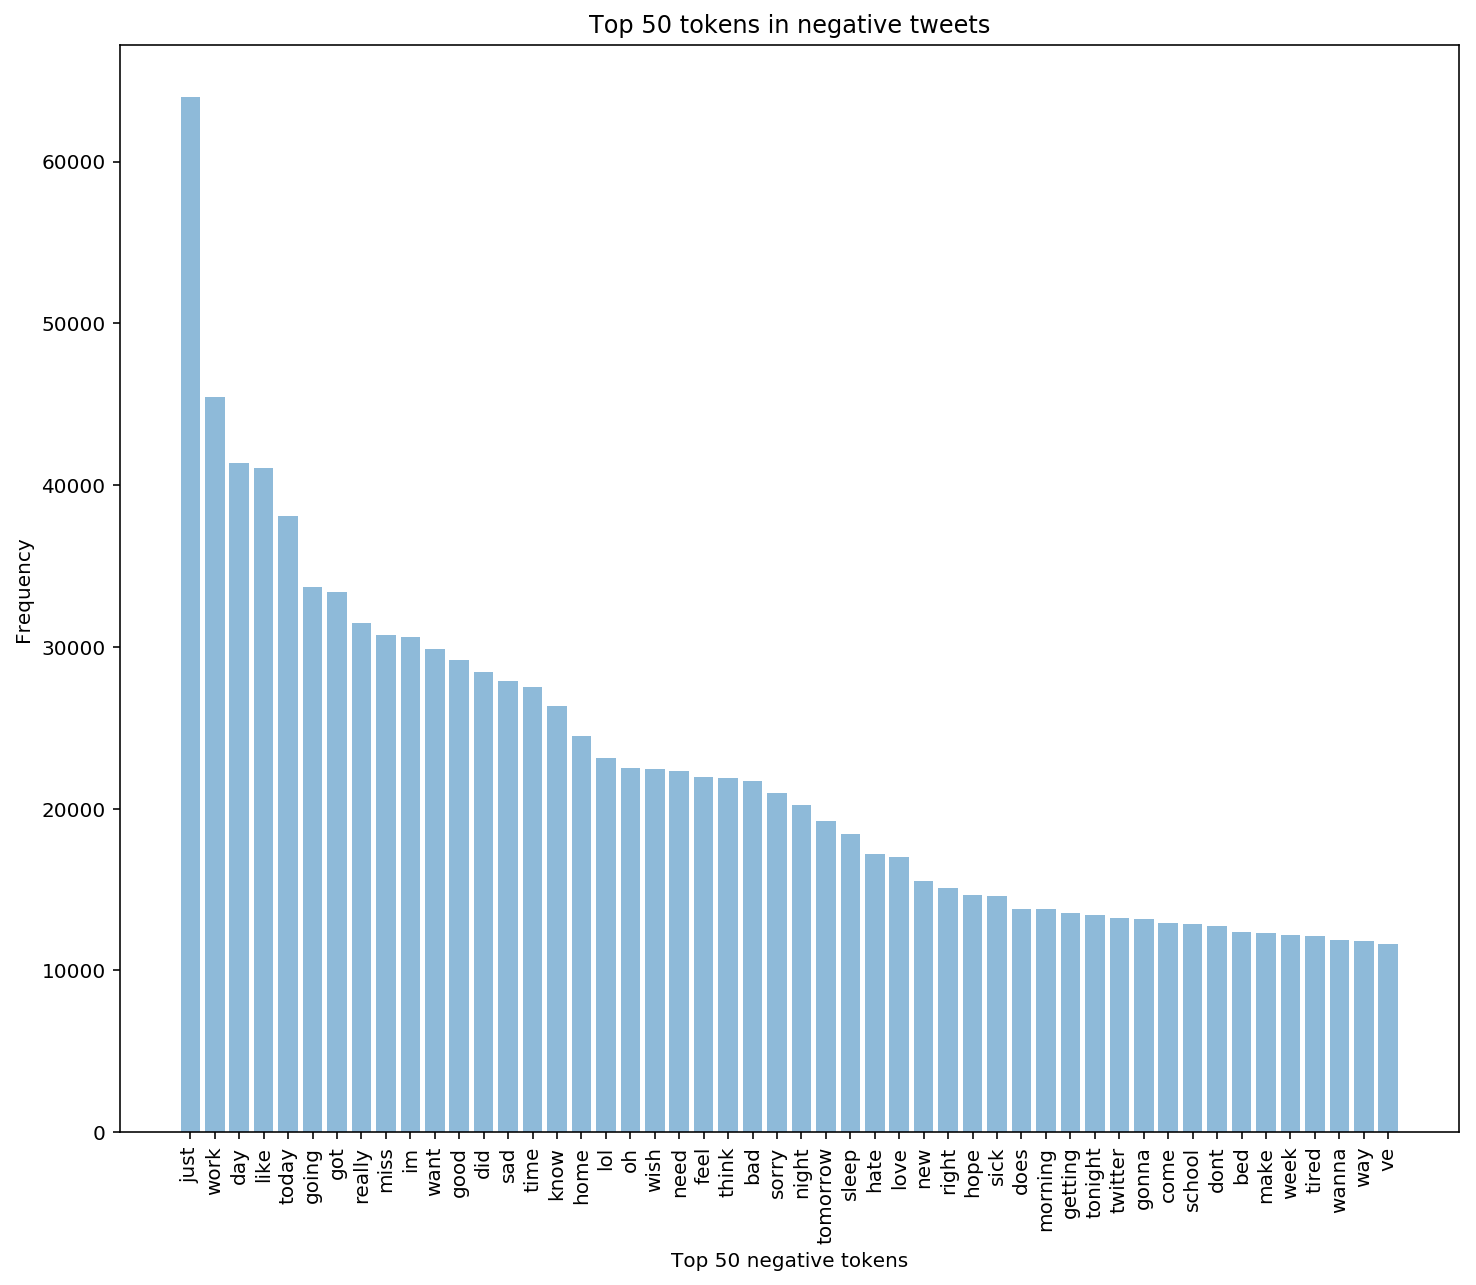

In [26]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5,1,'Top 50 tokens in positive tweets')

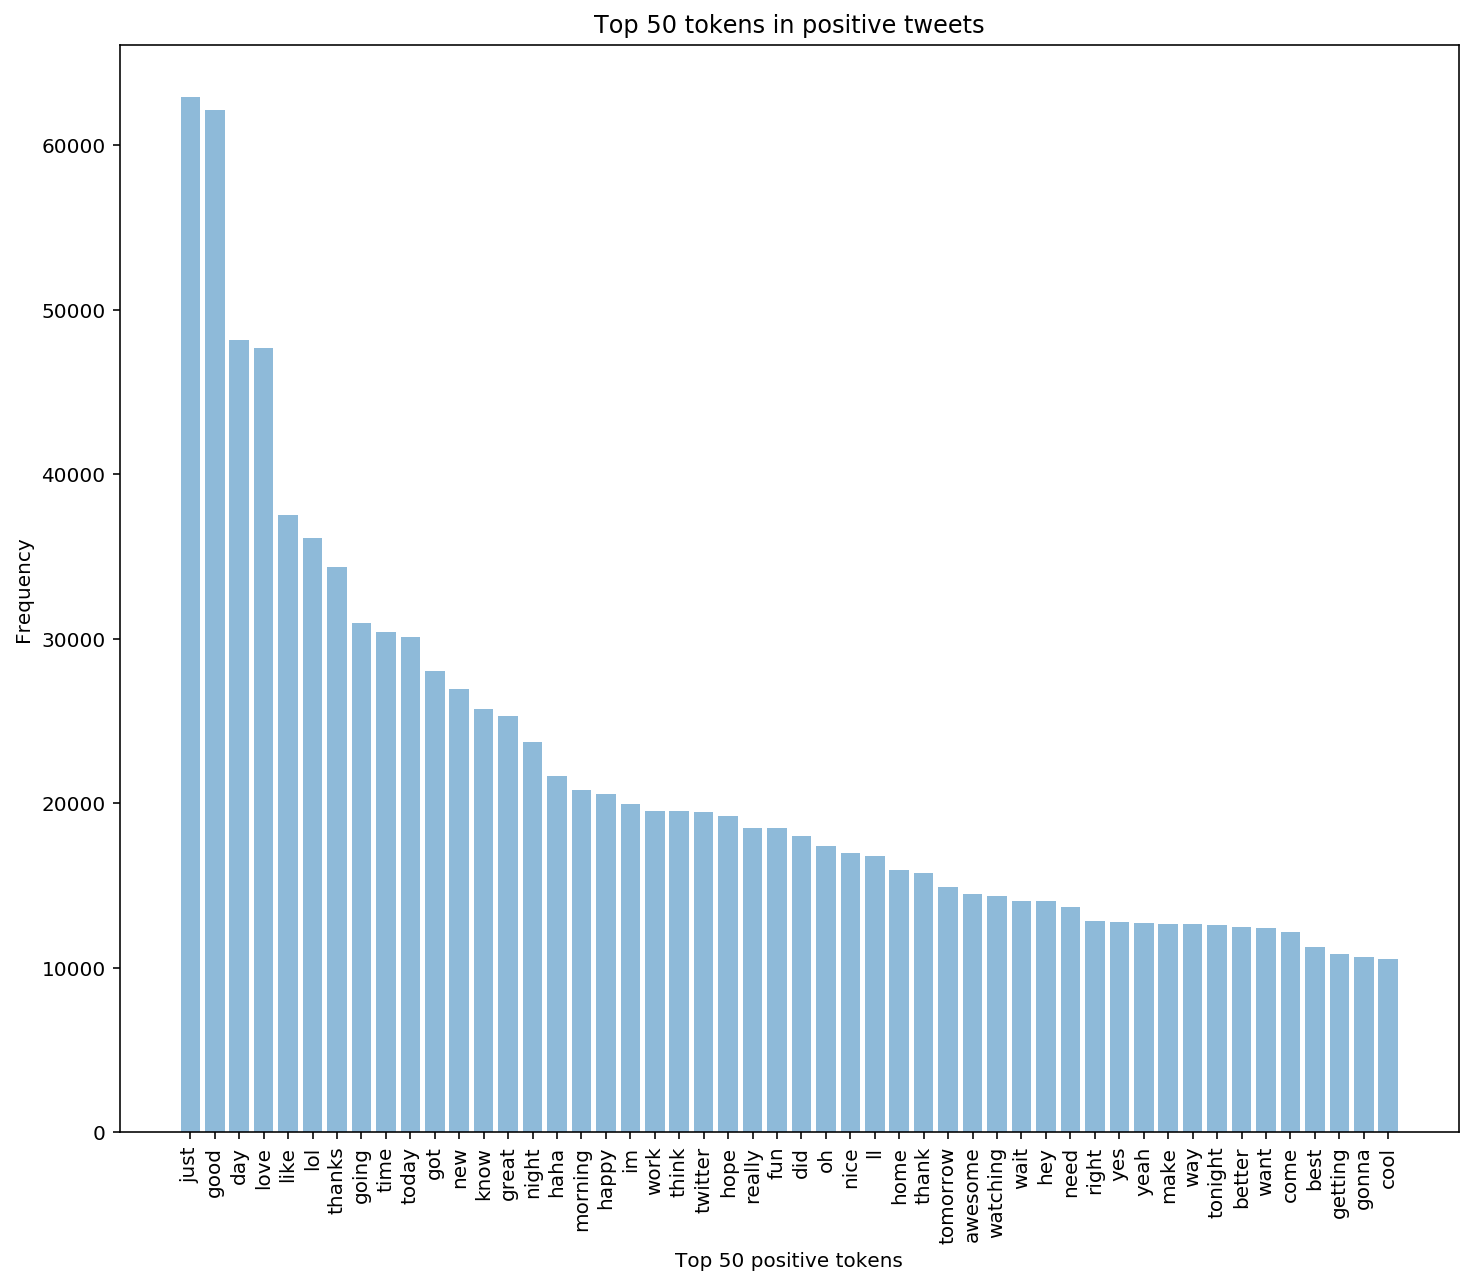

In [27]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

In [29]:
term_freq_df.head()

,negative,positive,total
aa,160,92,252
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


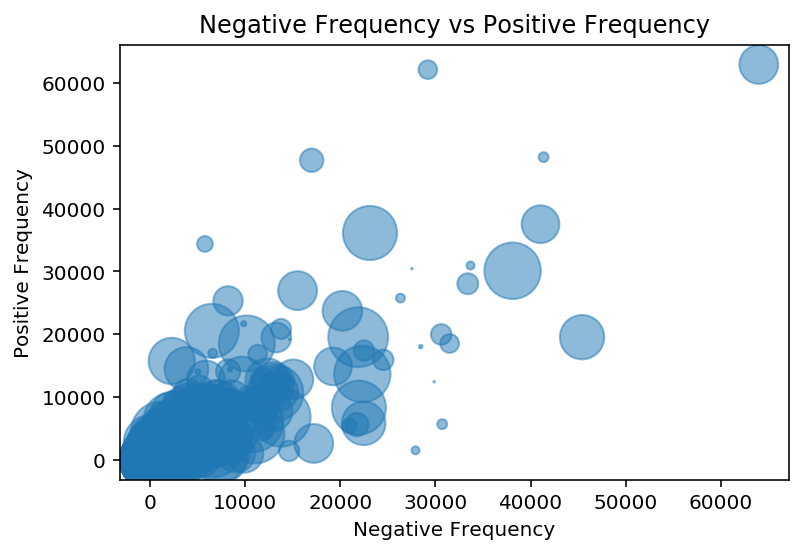

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
N = 50
area = (30 * np.random.rand(N))**2
plt.scatter(term_freq_df['negative'], term_freq_df['positive'], s=area, alpha=0.5)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.show()